In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
node_data = pd.read_csv("D:\Data Science\Social Network and Text analysis\Coursework\dataset\s1_nodes_updated.csv")
node_data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sneha\AppData\Local\Temp\ipykernel_25540\2641507907.py:1: SyntaxWarning: invalid escape sequence '\D'
  node_data = pd.read_csv("D:\Data Science\Social Network and Text analysis\Coursework\dataset\s1_nodes_updated.csv")


Id                  Label               House Gender
0    1               Jon Snow           Targaryen      M
1    2            Sansa Stark               Stark      F
2    3           Eddard Stark               Stark      M
3    4             Robb Stark               Stark      M
4    5          Catelyn Stark               Stark      F
5    6             Bran Stark               Stark      M
6    7          Theon Greyjoy             Greyjoy      M
7    8        Jaime Lannister           Lannister      M
8    9       Cersei Lannister           Lannister      F
9   10             Arya Stark               Stark      F
10  11       Robert Baratheon           Baratheon      M
11  12       Tyrion Lannister           Lannister      M
12  13      Viserys Targaryen           Targaryen      M
13  14     Daenerys Targaryen           Targaryen      F
14  15           Benjen Stark               Stark      M
15  16          Jorah Mormont             Mormont      M
16  17             Khal Drogo            Dothraki      M
17  18      Joffrey Lannister           Lannister      M
18  19                  Varys    King's Spymaster      M
19  20        Renly Baratheon           Baratheon      M
20  21          Petyr Baelish    King's Treasurer      M
21  22        Barristan Selmy          Kingsguard      M
22  23            Syrio Forel             Teacher      M
23  24              Sam Tarly       Night's Watch      M
24  25                  Bronn  Tyrion's Bodyguard      M
25  26             Lysa Arryn               Arryn      F
26  27            Robin Arryn               Arryn      M
27  28        Tywin Lannister           Lannister      M
28  29           Rickon Stark               Stark      M
29  30               Assassin            Assassin      M
30  31  Grand Maester Pycelle      King's Adviser      M

In [11]:
edge_data= pd.read_csv("D:\Data Science\Social Network and Text analysis\Coursework\dataset\s1_edges_filtered_size_reduced_gephi.csv")
edge_data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sneha\AppData\Local\Temp\ipykernel_25540\1601508780.py:1: SyntaxWarning: invalid escape sequence '\D'
  edge_data= pd.read_csv("D:\Data Science\Social Network and Text analysis\Coursework\dataset\s1_edges_filtered_size_reduced_gephi.csv")


Id    Season     Episode     Episode Title     Scene  \
0        1  Season 1   Episode 1  Winter is Coming   Scene 2   
1        2  Season 1   Episode 1  Winter is Coming   Scene 2   
2        3  Season 1   Episode 1  Winter is Coming   Scene 2   
3        4  Season 1   Episode 1  Winter is Coming   Scene 2   
4        5  Season 1   Episode 1  Winter is Coming   Scene 2   
...    ...       ...         ...               ...       ...   
1872  1873  Season 1  Episode 10    Fire and Blood  Scene 19   
1873  1874  Season 1  Episode 10    Fire and Blood  Scene 19   
1874  1875  Season 1  Episode 10    Fire and Blood  Scene 19   
1875  1876  Season 1  Episode 10    Fire and Blood  Scene 19   
1876  1877  Season 1  Episode 10    Fire and Blood  Scene 19   

                  Source Source House              Target Target House  \
0               Jon Snow    Targaryan            Jon Snow    Targaryan   
1           Eddard Stark        Stark            Jon Snow    Targaryan   
2               Jon Snow    Targaryan          Robb Stark        Stark   
3             Robb Stark        Stark            Jon Snow    Targaryan   
4               Jon Snow    Targaryan          Robb Stark        Stark   
...                  ...          ...                 ...          ...   
1872  Daenerys Targaryen    Targaryen       Jorah Mormont      Mormont   
1873       Jorah Mormont      Mormont  Daenerys Targaryen    Targaryen   
1874  Daenerys Targaryen    Targaryen       Jorah Mormont      Mormont   
1875       Jorah Mormont      Mormont  Daenerys Targaryen    Targaryen   
1876  Daenerys Targaryen    Targaryen  Daenerys Targaryen    Targaryen   

            Type                                        Interaction  \
0     Undirected                          Go on. Father's watching.   
1     Undirected  And which one of you was a marksman at ten? Ke...   
2     Undirected                        Don't think too much, Bran.   
3     Undirected                                Relax your bow arm.   
4     Undirected                                       Quick, Bran!   
...          ...                                                ...   
1872  Undirected                 They were not given to me to sell.   
1873  Undirected  Khaleesi, my Queen, l vow to serve you, obey y...   
1874  Undirected                      l must. You don't understand.   
1875  Undirected  Don't ask me to stand aside as you climb on th...   
1876  Undirected  ls that what you fear? You will be my khalasar...   

     Interaction type  Weight Interaction Result  
0        Conversation     1.0                NaN  
1        Conversation     1.0                NaN  
2        Conversation     1.0                NaN  
3        Conversation     1.0                NaN  
4        Conversation     1.0                NaN  
...               ...     ...                ...  
1872     Conversation     1.0                NaN  
1873     Conversation     1.0                NaN  
1874     Conversation     1.0                NaN  
1875     Conversation     1.0                NaN  
1876     Conversation     1.0                NaN  

[1877 rows x 14 columns]

In [12]:
filtered_edges = edge_data[['Source','Target','Weight']]
filtered_edges

Source              Target  Weight
0               Jon Snow            Jon Snow     1.0
1           Eddard Stark            Jon Snow     1.0
2               Jon Snow          Robb Stark     1.0
3             Robb Stark            Jon Snow     1.0
4               Jon Snow          Robb Stark     1.0
...                  ...                 ...     ...
1872  Daenerys Targaryen       Jorah Mormont     1.0
1873       Jorah Mormont  Daenerys Targaryen     1.0
1874  Daenerys Targaryen       Jorah Mormont     1.0
1875       Jorah Mormont  Daenerys Targaryen     1.0
1876  Daenerys Targaryen  Daenerys Targaryen     1.0

[1877 rows x 3 columns]

In [13]:
Got_graph = nx.Graph()
for node in node_data['Label']:
    Got_graph.add_node(node)
for src, tgt, wt in zip(filtered_edges['Source'], filtered_edges['Target'], filtered_edges['Weight']):
    Got_graph.add_edge(src,tgt, weight=wt)
Got_graph.remove_edges_from(nx.selfloop_edges(Got_graph))


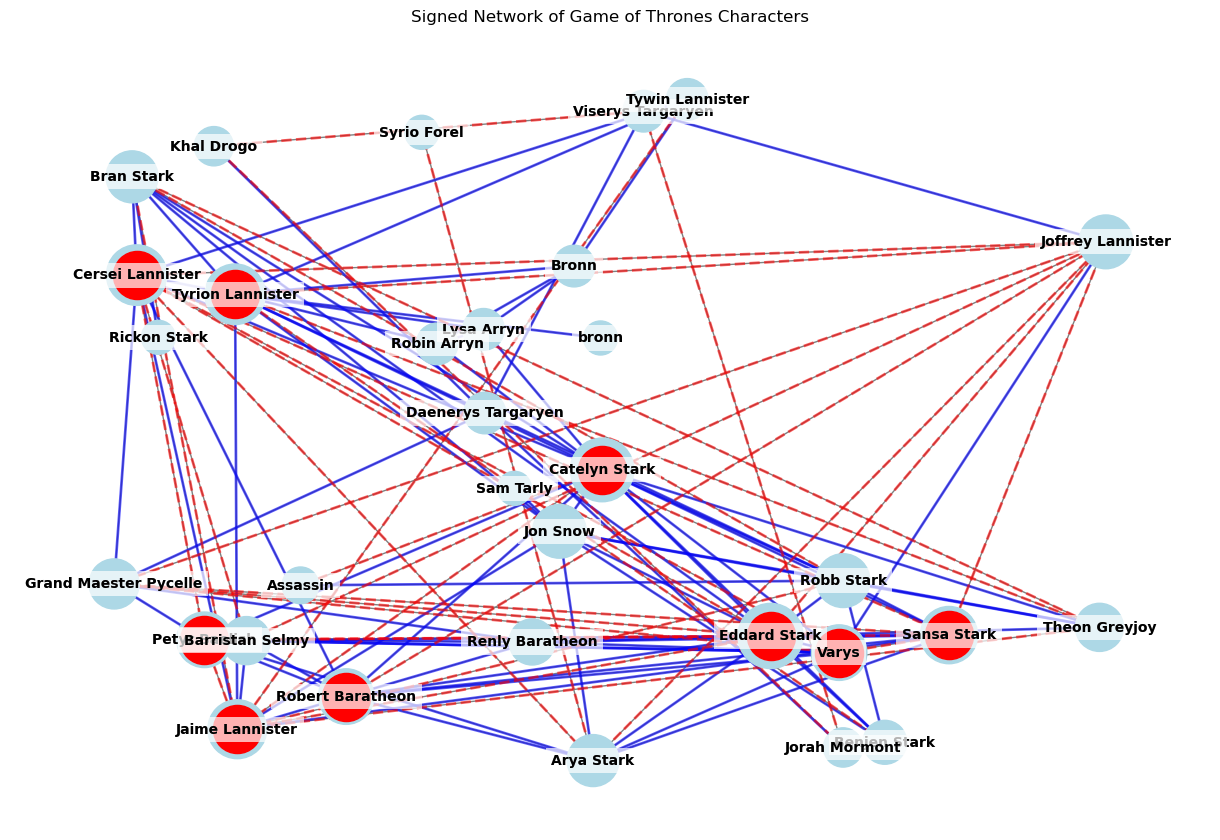

In [14]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(Got_graph, seed=42, k=0.5)
node_sizes = [500 + 100 * Got_graph.degree(n) for n in Got_graph.nodes()]
nx.draw(Got_graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=node_sizes, font_size=10, font_weight="bold")
# Draw positive edges in blue and negative edges in red
positive_edges = [(u, v) for u, v, d in Got_graph.edges(data=True) if d["weight"] == 1]
negative_edges = [(u, v) for u, v, d in Got_graph.edges(data=True) if d["weight"] == -1]
nx.draw_networkx_labels(
    Got_graph, pos, font_size=10, font_weight="bold",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)  # Adds contrast
)
central_nodes = [n for n, d in Got_graph.degree() if d > 10]  # Nodes with high connections
nx.draw_networkx_nodes(Got_graph, pos, nodelist=central_nodes, node_color="red", node_size=1200)
nx.draw_networkx_edges(Got_graph, pos, edgelist=positive_edges,  alpha=0.6,edge_color="blue", width=2)
nx.draw_networkx_edges(Got_graph, pos, edgelist=negative_edges, alpha=0.6, edge_color="red", width=2, style="dashed")
plt.title("Signed Network of Game of Thrones Characters")
plt.show()


In [15]:
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(Got_graph)
node_sizes = [500 + 100 * Got_graph.degree(n) for n in Got_graph.nodes()]
nx.draw(Got_graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=node_sizes, font_size=10, font_weight="bold")
# Draw positive edges in blue and negative edges in red
positive_edges = [(u, v) for u, v, d in Got_graph.edges(data=True) if d["weight"] == 1]
negative_edges = [(u, v) for u, v, d in Got_graph.edges(data=True) if d["weight"] == -1]

nx.draw_networkx_labels(
    Got_graph, pos, font_size=10, font_weight="bold",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)  # Adds contrast
)
nx.draw_networkx_edges(Got_graph, pos, edgelist=positive_edges, alpha=0.6,edge_color="blue", width=2)
nx.draw_networkx_edges(Got_graph, pos, edgelist=negative_edges, alpha=0.6,edge_color="red", width=2, style="dashed")
plt.title("Signed Network of Game of Thrones Characters")
plt.show()

ValueError: ('Contradictory paths found:', 'negative weights?')

<Figure size 1200x800 with 0 Axes>

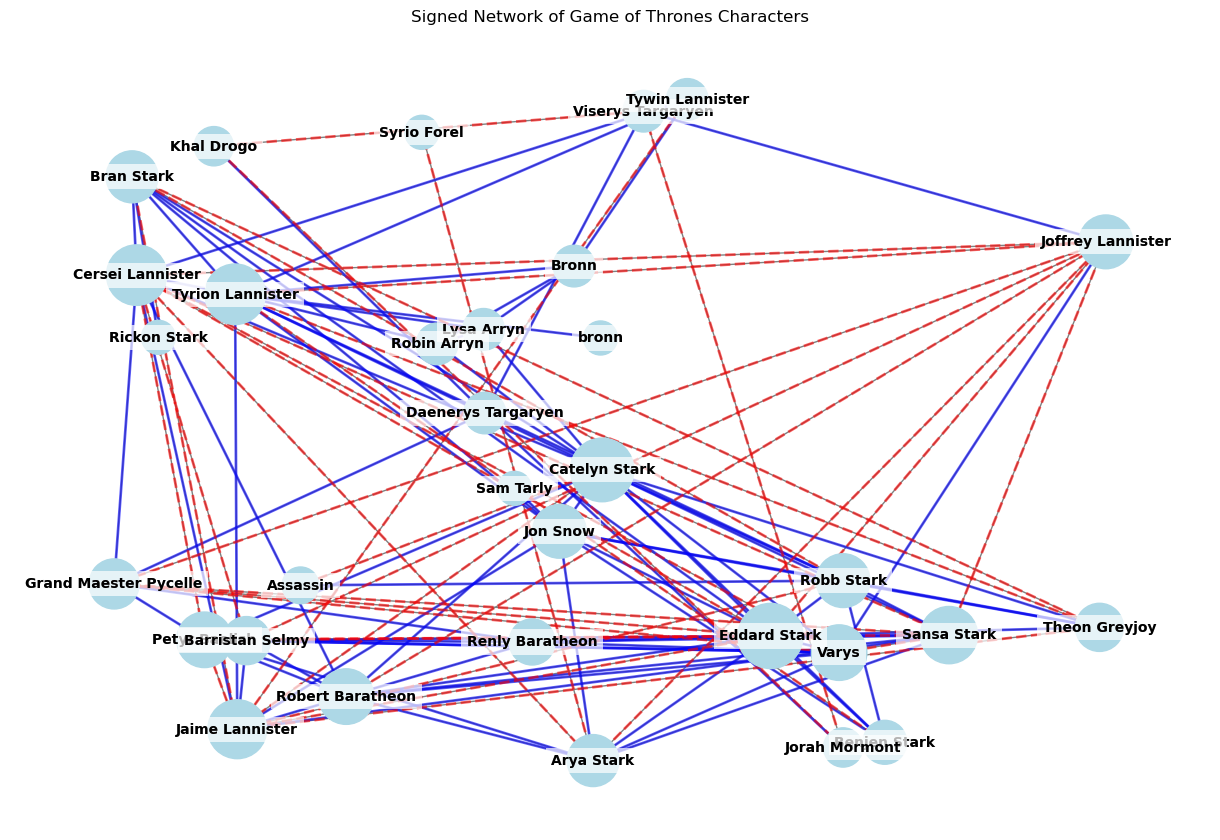

In [16]:
plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(Got_graph, seed=42, k=0.5)
node_sizes = [500 + 100 * Got_graph.degree(n) for n in Got_graph.nodes()]
nx.draw(Got_graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=node_sizes, font_size=10, font_weight="bold")
# Draw positive edges in blue and negative edges in red
positive_edges = [(u, v) for u, v, d in Got_graph.edges(data=True) if d["weight"] == 1]
negative_edges = [(u, v) for u, v, d in Got_graph.edges(data=True) if d["weight"] == -1]
nx.draw_networkx_labels(
    Got_graph, pos, font_size=10, font_weight="bold",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)  # Adds contrast
)
nx.draw_networkx_edges(Got_graph, pos, edgelist=positive_edges, alpha=0.6,edge_color="blue", width=2)
nx.draw_networkx_edges(Got_graph, pos, edgelist=negative_edges, alpha=0.6,edge_color="red", width=2, style="dashed")
plt.title("Signed Network of Game of Thrones Characters")
plt.show()

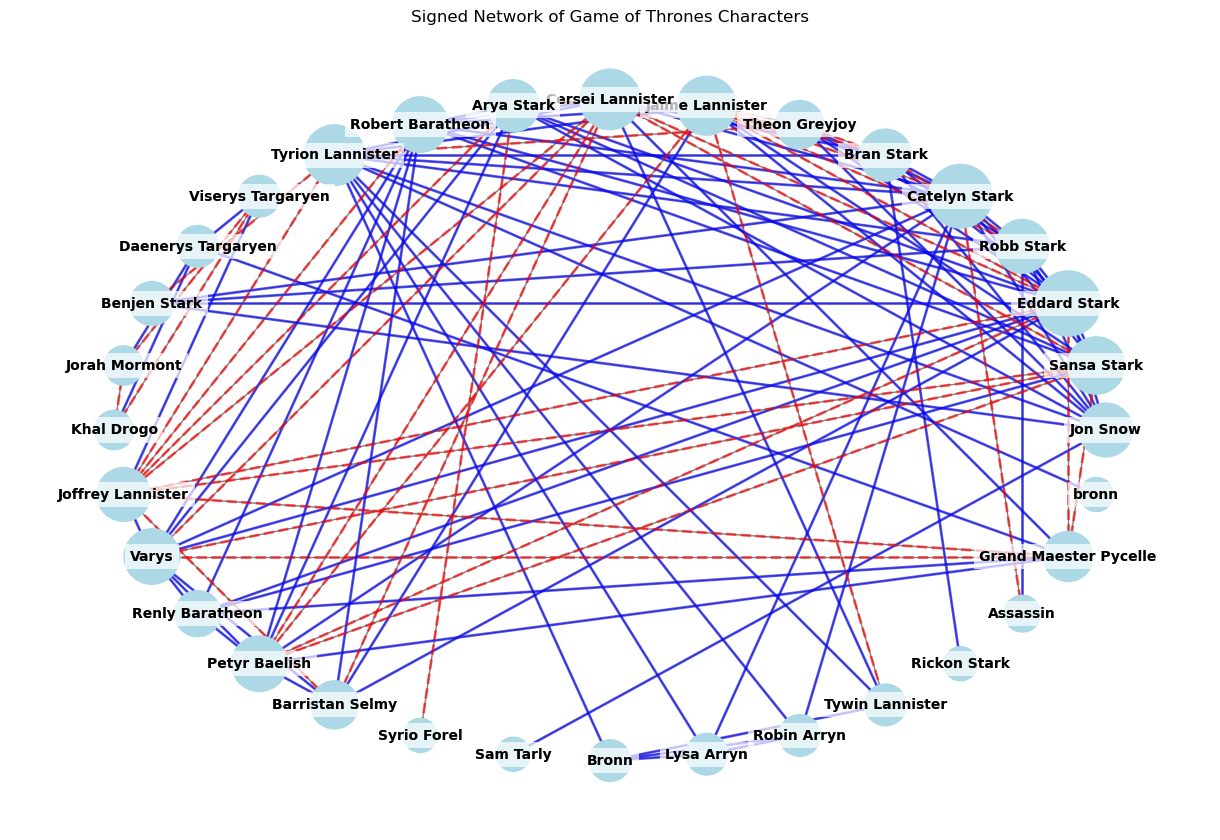

In [ ]:
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(Got_graph)
node_sizes = [500 + 100 * Got_graph.degree(n) for n in Got_graph.nodes()]
nx.draw(Got_graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=node_sizes, font_size=10, font_weight="bold")
# Draw positive edges in blue and negative edges in red
positive_edges = [(u, v) for u, v, d in Got_graph.edges(data=True) if d["weight"] == 1]
negative_edges = [(u, v) for u, v, d in Got_graph.edges(data=True) if d["weight"] == -1]
nx.draw_networkx_labels(
    Got_graph, pos, font_size=10, font_weight="bold",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)  # Adds contrast
)
nx.draw_networkx_edges(Got_graph, pos, edgelist=positive_edges, alpha=0.6,edge_color="blue", width=2)
nx.draw_networkx_edges(Got_graph, pos, edgelist=negative_edges, alpha=0.6,edge_color="red", width=2, style="dashed")
plt.title("Signed Network of Game of Thrones Characters")
plt.show()

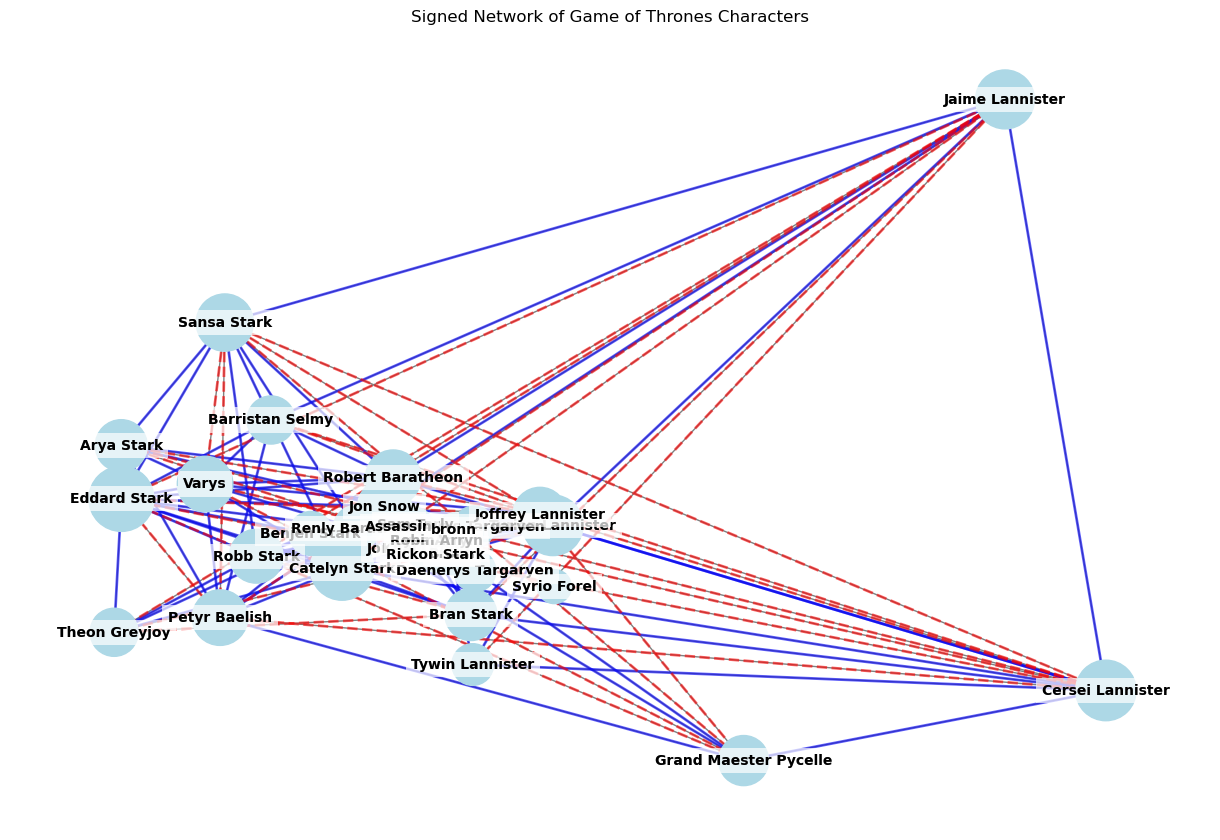

In [18]:
plt.figure(figsize=(12, 8))
pos = nx.spectral_layout(Got_graph)
node_sizes = [500 + 100 * Got_graph.degree(n) for n in Got_graph.nodes()]
nx.draw(Got_graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=node_sizes, font_size=10, font_weight="bold")
# Draw positive edges in blue and negative edges in red
positive_edges = [(u, v) for u, v, d in Got_graph.edges(data=True) if d["weight"] == 1]
negative_edges = [(u, v) for u, v, d in Got_graph.edges(data=True) if d["weight"] == -1]
nx.draw_networkx_labels(
    Got_graph, pos, font_size=10, font_weight="bold",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)  # Adds contrast
)
nx.draw_networkx_edges(Got_graph, pos, edgelist=positive_edges, alpha=0.6,edge_color="blue", width=2)
nx.draw_networkx_edges(Got_graph, pos, edgelist=negative_edges, alpha=0.6,edge_color="red", width=2, style="dashed")
plt.title("Signed Network of Game of Thrones Characters")
plt.show()

In [19]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.


In [20]:
from pyvis.network import Network

net = Network(notebook=True,cdn_resources='in_line')
net.from_nx(Got_graph)
net.show("got_graph.html")

got_graph.html


In [21]:
pip install nxviz

Note: you may need to restart the kernel to use updated packages.


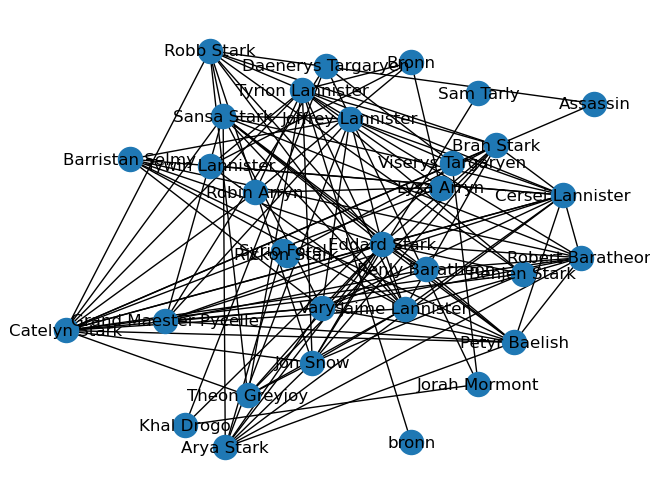

In [22]:
nx.draw_random(Got_graph, with_labels=True)

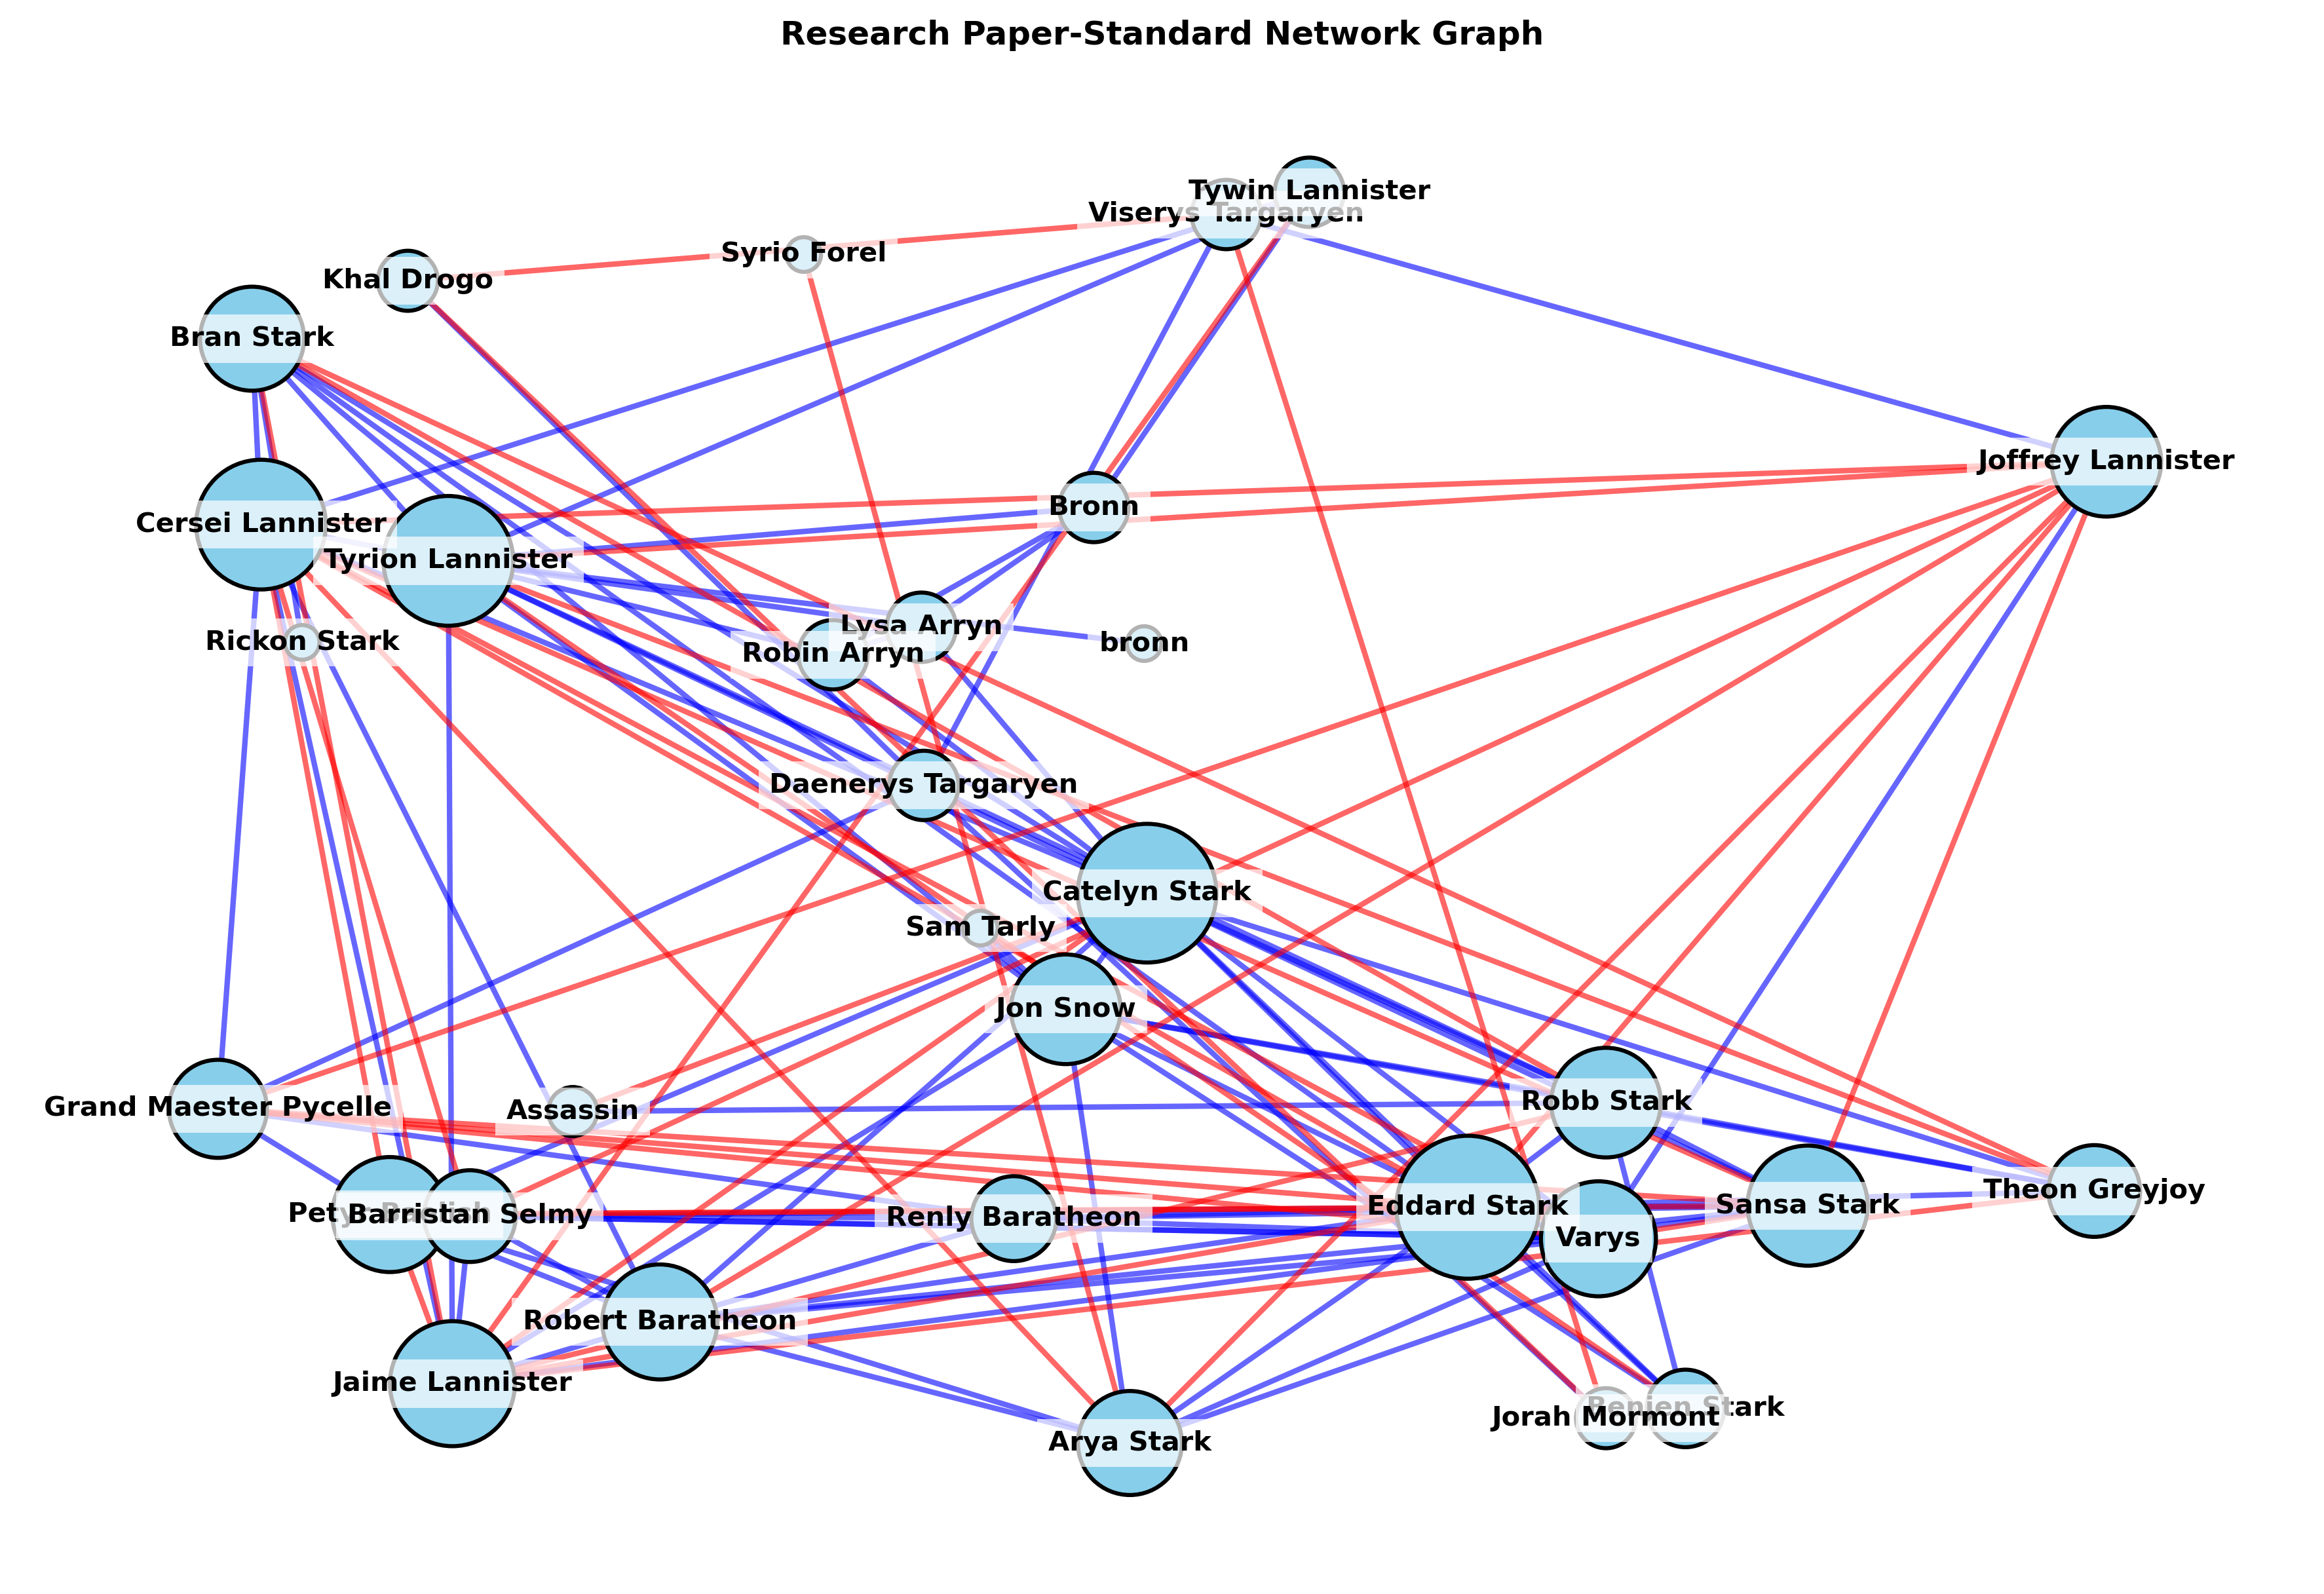

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph (replace with your dataset)
G = nx.Graph()
#edges = [(1, 2, 0.8), (1, 3, 0.6), (2, 3, 0.4), (2, 4, 0.9), (3, 4, 0.5)]
#G.add_weighted_edges_from(edges)
for node in node_data['Label']:
    G.add_node(node)
for src, tgt, wt in zip(filtered_edges['Source'], filtered_edges['Target'], filtered_edges['Weight']):
    G.add_edge(src,tgt, weight=wt)
G.remove_edges_from(nx.selfloop_edges(G))

# Define layout for better spacing
pos = nx.spring_layout(G, seed=42, k=0.5)  # k controls node spread

# Compute centrality for node sizing
degree_centrality = nx.degree_centrality(G)
node_sizes = [5000 * degree_centrality[n] for n in G.nodes()]

# Define edge widths based on weight
#edge_weights = [d["weight"] * 3 for _, _, d in G.edges(data=True)]  # Scale for visibility

# Create figure with high resolution
plt.figure(figsize=(15,10), dpi=300)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", edgecolors="black", linewidths=1.5)
positive_edges = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] == 1]
negative_edges = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] == -1]
# Draw edges
#nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=positive_edges, alpha=0.6,edge_color="blue", width=2)
nx.draw_networkx_edges(G, pos, edgelist=negative_edges, alpha=0.6,edge_color="red", width=2)
# Draw labels with background to avoid overlap
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold",
                        bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))

# Create edge labels (optional, only if needed)
#edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, alpha=0.7)

# Add title
plt.title("Research Paper-Standard Network Graph", fontsize=12, fontweight="bold")

# Remove axis
plt.axis("off")

# Show plot
plt.show()


In [30]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


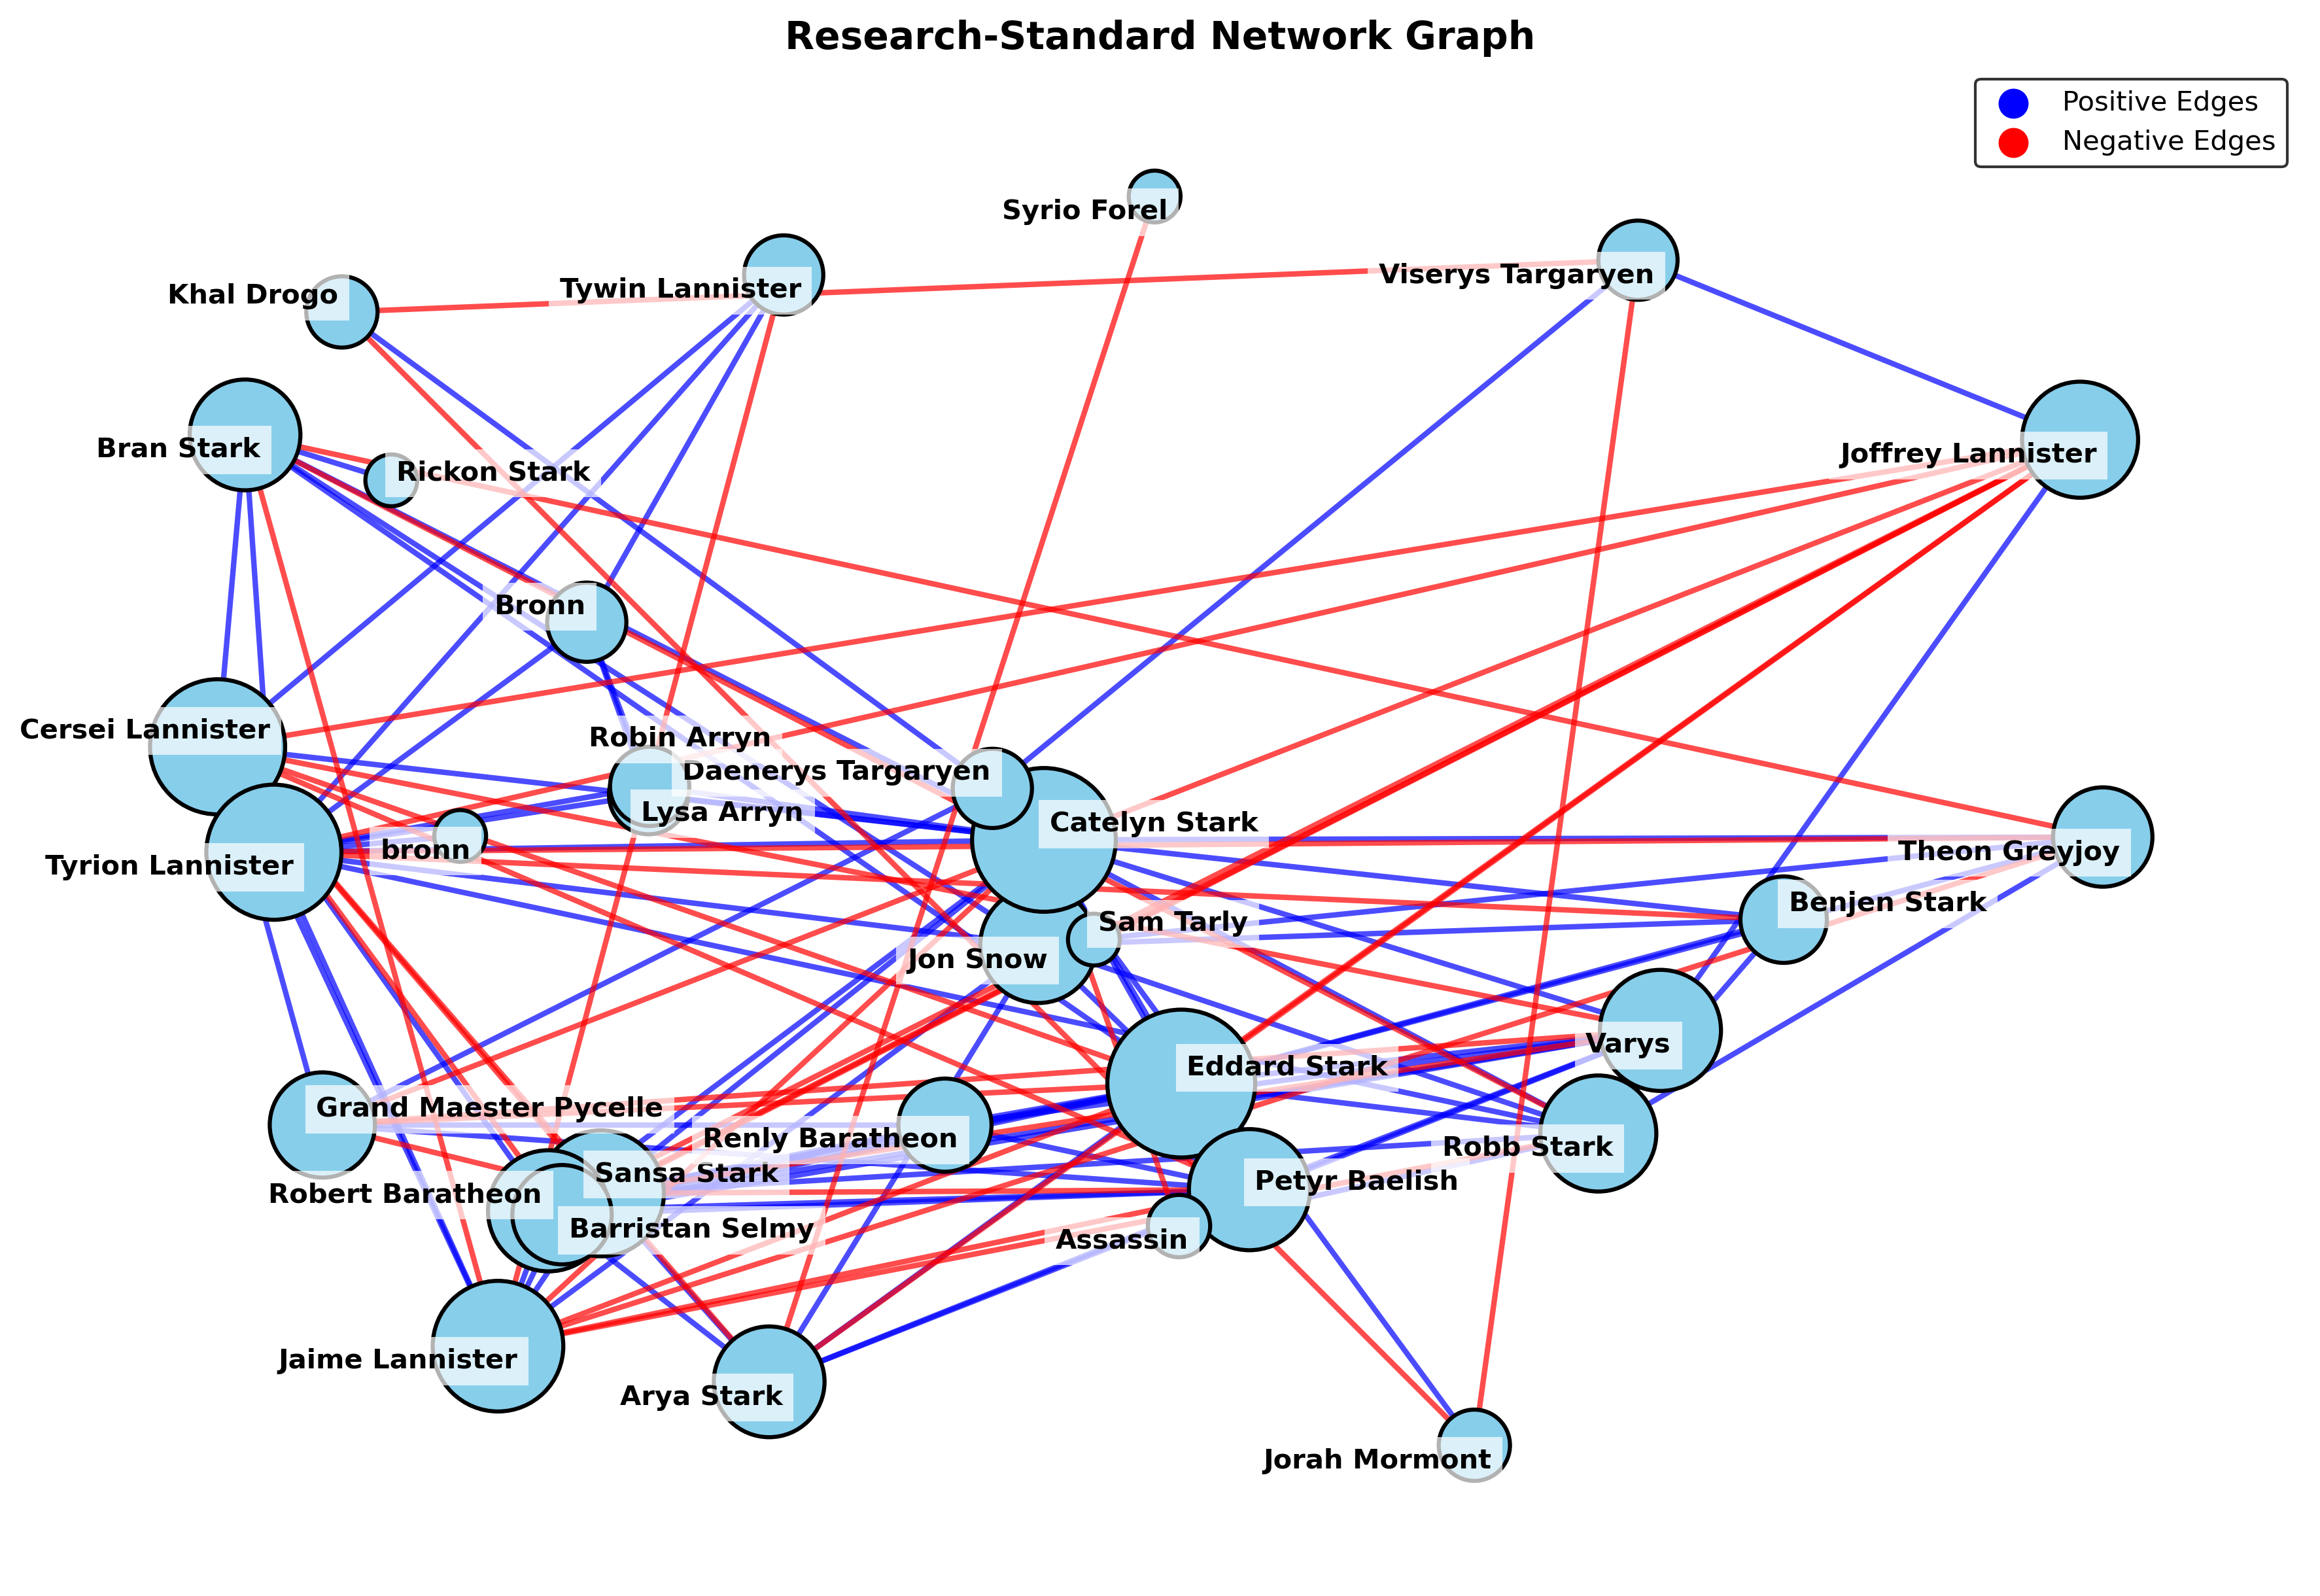

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text  # Helps in label placement

# Create Graph
G = nx.Graph()

# Add nodes and edges (Assuming 'node_data' and 'filtered_edges' are DataFrames)
for node in node_data['Label']:
    G.add_node(node)

for src, tgt, wt in zip(filtered_edges['Source'], filtered_edges['Target'], filtered_edges['Weight']):
    G.add_edge(src, tgt, weight=wt)

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Define improved layout for **better spacing & reduced overlap**
pos = nx.spring_layout(G, seed=42, k=0.75 / np.sqrt(len(G.nodes())))  

# Compute node centrality for **node size scaling**
degree_centrality = nx.degree_centrality(G)
node_sizes = [5000 * degree_centrality[n] + 200 for n in G.nodes()]  # Minimum size = 200

# Classify edges into positive and negative for better visualization
positive_edges = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] > 0]
negative_edges = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] < 0]

# Normalize edge weights for better visibility
edge_weights = [abs(d["weight"]) * 3 for _, _, d in G.edges(data=True)]

# Create figure with **high-resolution**
plt.figure(figsize=(15, 10), dpi=300)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", edgecolors="black", linewidths=1.5)

# Draw edges with classification
nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color="blue", width=2, alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color="red", width=2, alpha=0.7)

# Add labels and adjust to avoid overlap
text_labels = nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", 
                                      bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))
adjust_text(list(text_labels.values()))  # Automatically adjust labels to avoid overlap

# Add a legend for clarity
plt.scatter([], [], color="blue", label="Positive Edges", s=100)
plt.scatter([], [], color="red", label="Negative Edges", s=100)
plt.legend(loc="upper right", fontsize=10, frameon=True, edgecolor="black")

# Add title
plt.title("Research-Standard Network Graph", fontsize=14, fontweight="bold")

# Remove axis for a cleaner look
plt.axis("off")

# Show plot
plt.show()


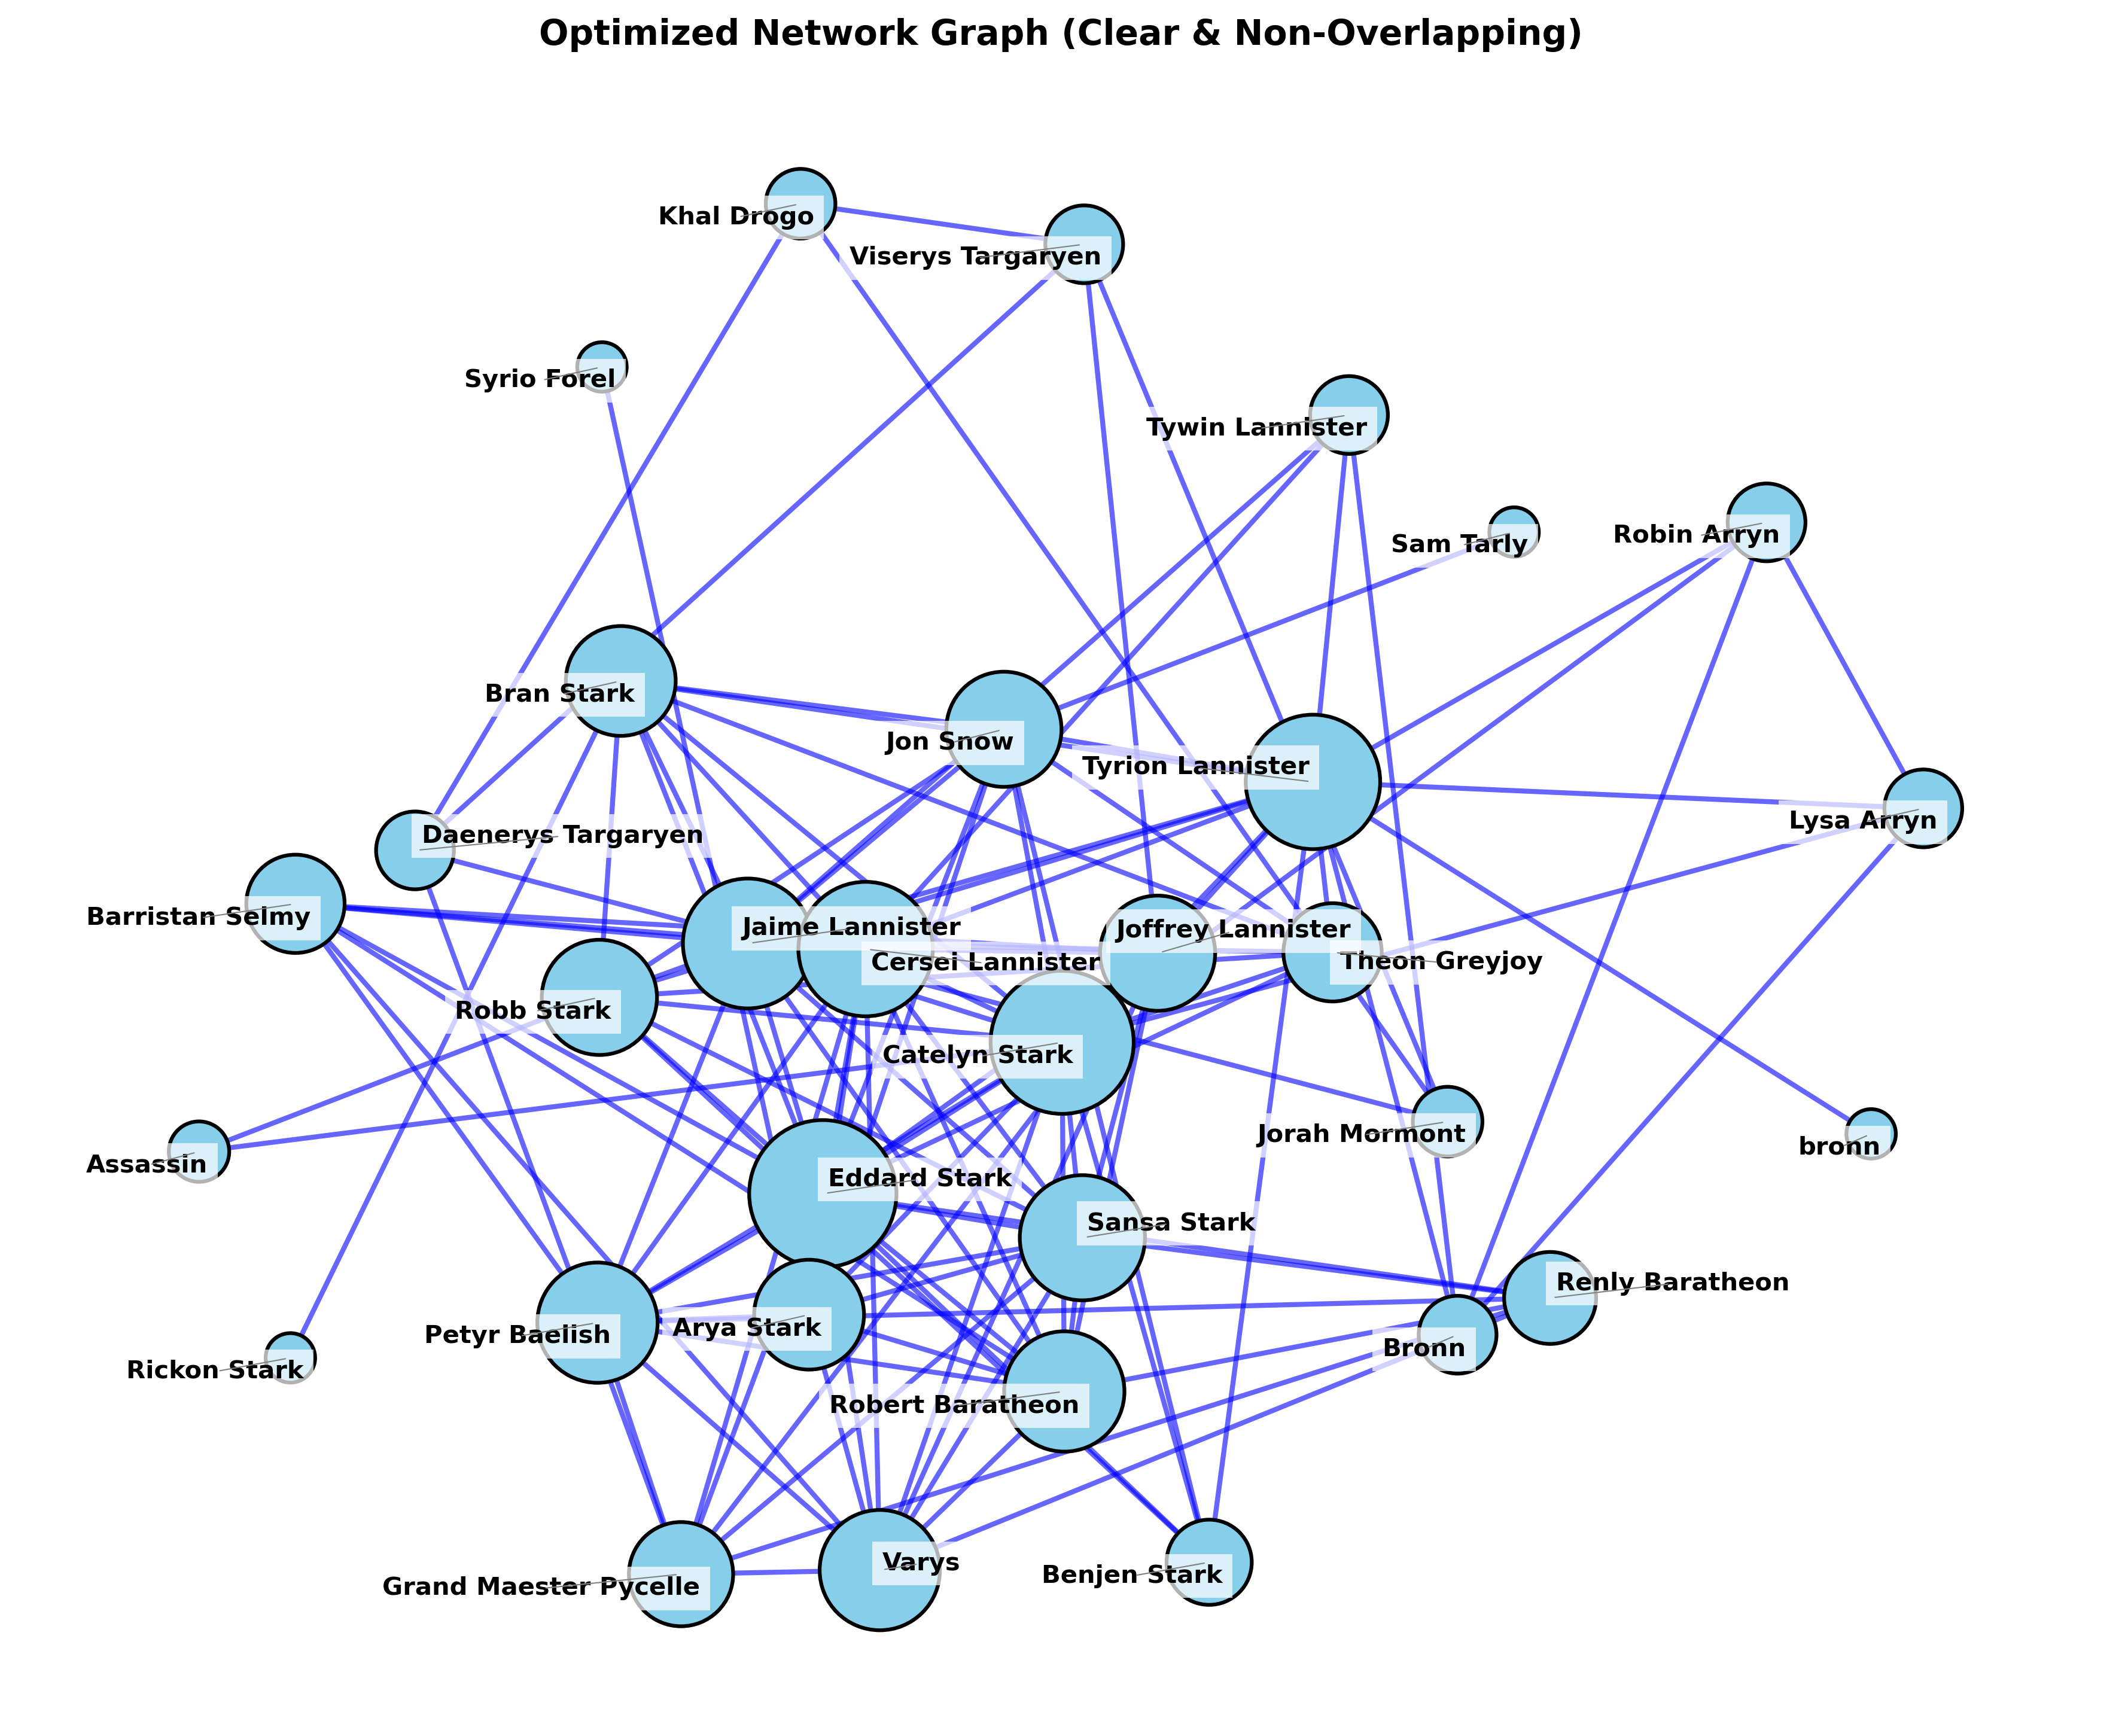

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text  

# Create Graph
G = nx.Graph()

# Add Nodes
for node in node_data['Label']:
    G.add_node(node)

# Add Weighted Edges
for src, tgt, wt in zip(filtered_edges['Source'], filtered_edges['Target'], filtered_edges['Weight']):
    G.add_edge(src, tgt, weight=abs(wt))  # Use absolute weight to avoid errors

# Remove Self-Loops
G.remove_edges_from(nx.selfloop_edges(G))

# **Try Different Layouts for Better Clarity**
try:
    pos = nx.nx_agraph.graphviz_layout(G, prog="neato")  # Best layout if Graphviz is installed
except:
    pos = nx.fruchterman_reingold_layout(G, seed=42, k=1.5)  # Alternative with high spacing

# **Compute Centrality for Node Sizes**
degree_centrality = nx.degree_centrality(G)
node_sizes = [6000 * degree_centrality[n] + 200 for n in G.nodes()]  # Ensuring minimum size

# **Categorize Edges by Weight**
positive_edges = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] > 0]
negative_edges = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] < 0]

# **Draw the Graph**
plt.figure(figsize=(15, 12), dpi=300)

# **Draw Nodes**
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", edgecolors="black", linewidths=1.5)

# **Draw Edges**
nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color="blue", width=2, alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color="red", width=2, alpha=0.6)

# **Draw Labels with Adjustments**
text_labels = nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", 
                                      bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))
adjust_text(list(text_labels.values()), expand_points=(1.5, 2.0), expand_text=(1.2, 1.5),
            force_text=(0.3, 0.4), arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# **Title & Aesthetics**
plt.title("Optimized Network Graph (Clear & Non-Overlapping)", fontsize=14, fontweight="bold")
plt.axis("off")

# **Show Graph**
plt.show()


In [38]:
pip install pygraphviz

     ---------------------------------------- 0.0/106.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/106.0 kB ? eta -:--:--
     -------------- ---------------------- 41.0/106.0 kB 495.5 kB/s eta 0:00:01
     ---------------------------------- - 102.4/106.0 kB 991.0 kB/s eta 0:00:01
     ------------------------------------ 106.0/106.0 kB 684.0 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [48 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-312\pygraphviz
      copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-312\pygraphviz
      copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-312\pygraphviz
      copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-312\pygraphviz
      copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-312\pygraphviz
      copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-312\pygraphviz
      creating build\lib.win-amd64-cpython-312\pygraphviz\tests
      copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-cpython-312\pygraphviz\tests
      copying pygraphviz\tests\test_clear.py -> build\lib.win-amd64-cpython-312\pygraphviz\tests
      copying pygraphviz\test

In [39]:
pos = nx.kamada_kawai_layout(G)

In [24]:
filtered_edges.to_csv("new_s1_edge.csv")

In [25]:
raw_data = pd.read_csv("D:\Data Science\Social Network and Text analysis\Coursework\dataset\s1_edges_updated.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sneha\AppData\Local\Temp\ipykernel_25540\4272515025.py:1: SyntaxWarning: invalid escape sequence '\D'
  raw_data = pd.read_csv("D:\Data Science\Social Network and Text analysis\Coursework\dataset\s1_edges_updated.csv")


In [26]:
raw_data

Season     Episode     Episode Title     Scene                Name  \
0     Season 1   Episode 1  Winter is Coming   Scene 1        waymar royce   
1     Season 1   Episode 1  Winter is Coming   Scene 1                will   
2     Season 1   Episode 1  Winter is Coming   Scene 1        waymar royce   
3     Season 1   Episode 1  Winter is Coming   Scene 1                will   
4     Season 1   Episode 1  Winter is Coming   Scene 1               gared   
...        ...         ...               ...       ...                 ...   
3175  Season 1  Episode 10    Fire and Blood  Scene 19  daenerys targaryen   
3176  Season 1  Episode 10    Fire and Blood  Scene 19  daenerys targaryen   
3177  Season 1  Episode 10    Fire and Blood  Scene 19      mirri maz duur   
3178  Season 1  Episode 10    Fire and Blood  Scene 19  daenerys targaryen   
3179  Season 1  Episode 10    Fire and Blood  Scene 19       jorah mormont   

                 Speaker House of Speaker            Listener  \
0           Waymar Royce    Night's Watch                Will   
1                   Will    Night's Watch        Waymar Royce   
2           Waymar Royce    Night's Watch                Will   
3                   Will    Night's Watch               Gared   
4                  Gared    Night's Watch               Royce   
...                  ...              ...                 ...   
3175  Daenerys Targaryen        Targaryen  Daenerys Targaryen   
3176  Daenerys Targaryen        Targaryen      Mirri Maz Duur   
3177      Mirri Maz Duur         Godswife  Daenerys Targaryen   
3178  Daenerys Targaryen        Targaryen       Jorah Mormont   
3179       Jorah Mormont          Mormont  Daenerys Targaryen   

     House of Listener                                        Interaction  \
0        Night's Watch  What do you expect? They're savages. One lot s...   
1        Night's Watch  I've never seen wildlings do a thing like this...   
2        Night's Watch                             How close did you get?   
3        Night's Watch                            Close as any man would.   
4        Night's Watch                   We should head back to the wall.   
...                ...                                                ...   
3175         Targaryen  ls that what you fear? You will be my khalasar...   
3176          Godswife  Ser Jorah, bind this woman to the pyre. You sw...   
3177         Targaryen                       You will not hear me scream.   
3178           Mormont  I will. But it is not your screams I want. Onl...   
3179         Targaryen                                 Blood of my blood.   

     Interaction type  Interaction Score Interaction Result  
0        Conversation                1.0                NaN  
1        Conversation                1.0                NaN  
2        Conversation                1.0                NaN  
3        Conversation                1.0                NaN  
4        Conversation                1.0                NaN  
...               ...                ...                ...  
3175     Conversation                1.0                NaN  
3176     Conversation                1.0                NaN  
3177     Conversation                1.0                NaN  
3178     Conversation                1.0                NaN  
3179     Conversation                1.0                NaN  

[3180 rows x 13 columns]

In [27]:
conflict_data = raw_data[raw_data["Interaction Score"]==-1.0]
conflict_data

Season     Episode     Episode Title     Scene                Name  \
42    Season 1   Episode 1  Winter is Coming   Scene 3        eddard stark   
92    Season 1   Episode 1  Winter is Coming   Scene 5       catelyn stark   
326   Season 1   Episode 1  Winter is Coming  Scene 17     jaime lannister   
344   Season 1   Episode 2     The Kingsroad  Scene 1     tyrion lannister   
345   Season 1   Episode 2     The Kingsroad   Scene 1   joffrey lannister   
...        ...         ...               ...       ...                 ...   
3007  Season 1  Episode 10    Fire and Blood   Scene 9     jaime lannister   
3028  Season 1  Episode 10    Fire and Blood  Scene 11  daenerys targaryen   
3029  Season 1  Episode 10    Fire and Blood  Scene 11       jorah mormont   
3082  Season 1  Episode 10    Fire and Blood  Scene 14            jon snow   
3083  Season 1  Episode 10    Fire and Blood  Scene 14   sam pyp and grenn   

                 Speaker House of Speaker            Listener  \
42          Eddard Stark            Stark            Jon Snow   
92         Catelyn Stark            Stark        Eddard Stark   
326      Jaime Lannister        Lannister          Bran Stark   
344     Tyrion Lannister        Lannister   Joffrey Lannister   
345    Joffrey Lannister        Lannister    Tyrion Lannister   
...                  ...              ...                 ...   
3007     Jaime Lannister        Lannister       Catelyn Stark   
3028  Daenerys Targaryen        Targaryen       Jorah Mormont   
3029       Jorah Mormont          Mormont  Daenerys Targaryen   
3082            Jon Snow        Targaryen   Sam Pyp And Grenn   
3083   Sam Pyp And Grenn    Night's watch               Grenn   

     House of Listener                                        Interaction  \
42           Targaryan  Lord of the Seven Kingdoms and protector of th...   
92               Stark  There was a raven from Kings Landing. Jon Arry...   
326              Stark                                               Ten.   
344          Lannister                   One word and I'll hit you again.   
345          Lannister                                I'm telling mother!   
...                ...                                                ...   
3007             Stark  You should get some sleep. lt's going to be a ...   
3028           Mormont     My son – where is he? l want him. Where is he?   
3029         Targaryen                              The boy did not live.   
3082     Night's watch                                             Ghost?   
3083     Night's watch                            Hyah! Hyah! Hyah! Hyah!   

     Interaction type  Interaction Score Interaction Result  
42              Order               -1.0                  W  
92           Conflict               -1.0                  L  
326          Conflict               -1.0                  W  
344             Angry               -1.0                NaN  
345            Afraid               -1.0                NaN  
...               ...                ...                ...  
3007     Verbal Fight               -1.0                NaN  
3028            Shock               -1.0                NaN  
3029            Shock               -1.0                NaN  
3082           Afraid               -1.0                NaN  
3083           Afraid               -1.0                NaN  

[378 rows x 13 columns]

In [28]:
filtered_conflict_data

NameError: name 'filtered_conflict_data' is not defined

In [ ]:
filtered_conflict_data = conflict_data[['Episode','Speaker','Listener']]
filtered_conflict_data.rename(columns={'Speaker':'Source','Listener':'Target'}, inplace=True)
grouped_conflict_data = filtered_conflict_data.groupby(['Episode','Source','Target']).size().reset_index(name='Weight')
sorted_conflict_data = grouped_conflict_data.sort_values(by='Weight',ascending=False,ignore_index=True)
sorted_conflict_data

C:\Users\sneha\AppData\Local\Temp\ipykernel_11100\995479152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_conflict_data.rename(columns={'Speaker':'Source','Listener':'Target'}, inplace=True)


Episode             Source            Target  Weight
0     Episode 7   Cersei Lannister      Eddard Stark      12
1     Episode 7       Eddard Stark  Cersei Lannister      11
2     Episode 7    Tywin Lannister   Jaime Lannister      10
3     Episode 7    Jaime Lannister   Tywin Lannister       9
4    Episode 10  Joffrey Lannister       Sansa Stark       8
..          ...                ...               ...     ...
177   Episode 6   Cersei Lannister  Cersei Lannister       1
178   Episode 6         Bran Stark     Theon Greyjoy       1
179   Episode 6   Beric Dondarrion      Eddard Stark       1
180   Episode 5   Tyrion Lannister       Robin Arryn       1
181   Episode 9              Yoren       Sansa Stark       1

[182 rows x 4 columns]

In [ ]:
import numpy as np

In [ ]:
src_nodes = conflict_data['Speaker'].unique()
tgt_nodes = conflict_data['Listener'].unique()
nodes = np.concatenate((src_nodes, tgt_nodes))
nodes_df = pd.DataFrame(nodes, columns=['Nodes'])
nodes_df.drop_duplicates(inplace=True)
nodes_df.dropna(inplace=True)
nodes_df

Nodes
0            Eddard Stark
1           Catelyn Stark
2         Jaime Lannister
3        Tyrion Lannister
4       Joffrey Lannister
5                Assassin
6              Arya Stark
7        Cersei Lannister
8           Petyr Baelish
9             Sansa Stark
10           Benjen Stark
11             Robb Stark
12          Theon Greyjoy
13     Daenerys Targaryen
14      Viserys Targaryen
15       Robert Baratheon
16             Lysa Arryn
17            Robin Arryn
18            Jory Cassel
19             Bran Stark
20               Wildling
21       Beric Dondarrion
22  Grand Maester Pycelle
23          Jorah Mormont
24             Khal Drogo
25        Tywin Lannister
26                   Osha
27          Wine Merchant
28            Janos Slynt
29          Septa Mordane
30            Meryn Trant
31            Syrio Forel
32            Maryn Trant
33            Kings Guard
34         Sandor Clegane
35        Barristan Selmy
36                  Varys
37                  Qotho
38                Rakharo
39               Populace
40                  Yoren
41              Marillion
42               Jon Snow
43      Sam Pyp And Grenn
69                 Knight
75          Maester Luwin
77                 Doreah
86           King Joffrey
88         Mirri Maz Duur
90         Greatjon Umber
95                  Grenn

In [ ]:
nodes_df.to_csv("conflict_nodes_s1.csv")

In [ ]:
sorted_conflict_data.to_csv("conflict_edges_s1_episode.csv")

In [ ]:

sorted_conflict_data['Episode'] = sorted_conflict_data['Episode'].str.replace('Episode ', '', regex=True)



In [ ]:
sorted_conflict_data

Episode             Source            Target  Weight
0         7   Cersei Lannister      Eddard Stark      12
1         7       Eddard Stark  Cersei Lannister      11
2         7    Tywin Lannister   Jaime Lannister      10
3         7    Jaime Lannister   Tywin Lannister       9
4        10  Joffrey Lannister       Sansa Stark       8
..      ...                ...               ...     ...
177       6   Cersei Lannister  Cersei Lannister       1
178       6         Bran Stark     Theon Greyjoy       1
179       6   Beric Dondarrion      Eddard Stark       1
180       5   Tyrion Lannister       Robin Arryn       1
181       9              Yoren       Sansa Stark       1

[182 rows x 4 columns]

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # Install with: pip install python-louvain

# Compute Communities Using Louvain Method
partition = community.best_partition(G)  # Dictionary: {node: community_id}

# Assign a unique color to each community
unique_communities = list(set(partition.values()))
color_map = {com: plt.cm.Set3(i / len(unique_communities)) for i, com in enumerate(unique_communities)}
node_colors = [color_map[partition[n]] for n in G.nodes()]


In [41]:
# Compute Centrality Measures
degree_centrality = nx.degree_centrality(G)

# Scale node size based on centrality (adjust multiplier for visibility)
node_sizes = [3000 * degree_centrality[n] for n in G.nodes()]


In [43]:
modularity_score = community.modularity(partition, G)
print(f"Modularity Score: {modularity_score:.4f}")

Modularity Score: 0.3409


In [46]:
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_degree_centrality:
    print(f"Node: {node}, Degree Centrality: {centrality:.4f}")

Node: Eddard Stark, Degree Centrality: 0.5484
Node: Catelyn Stark, Degree Centrality: 0.5161
Node: Cersei Lannister, Degree Centrality: 0.4516
Node: Tyrion Lannister, Degree Centrality: 0.4516
Node: Jaime Lannister, Degree Centrality: 0.4194
Node: Sansa Stark, Degree Centrality: 0.3871
Node: Robert Baratheon, Degree Centrality: 0.3548
Node: Varys, Degree Centrality: 0.3548
Node: Petyr Baelish, Degree Centrality: 0.3548
Node: Jon Snow, Degree Centrality: 0.3226
Node: Robb Stark, Degree Centrality: 0.3226
Node: Joffrey Lannister, Degree Centrality: 0.3226
Node: Bran Stark, Degree Centrality: 0.2903
Node: Arya Stark, Degree Centrality: 0.2903
Node: Grand Maester Pycelle, Degree Centrality: 0.2581
Node: Theon Greyjoy, Degree Centrality: 0.2258
Node: Barristan Selmy, Degree Centrality: 0.2258
Node: Renly Baratheon, Degree Centrality: 0.1935
Node: Benjen Stark, Degree Centrality: 0.1613
Node: Viserys Targaryen, Degree Centrality: 0.1290
Node: Daenerys Targaryen, Degree Centrality: 0.1290
Nod

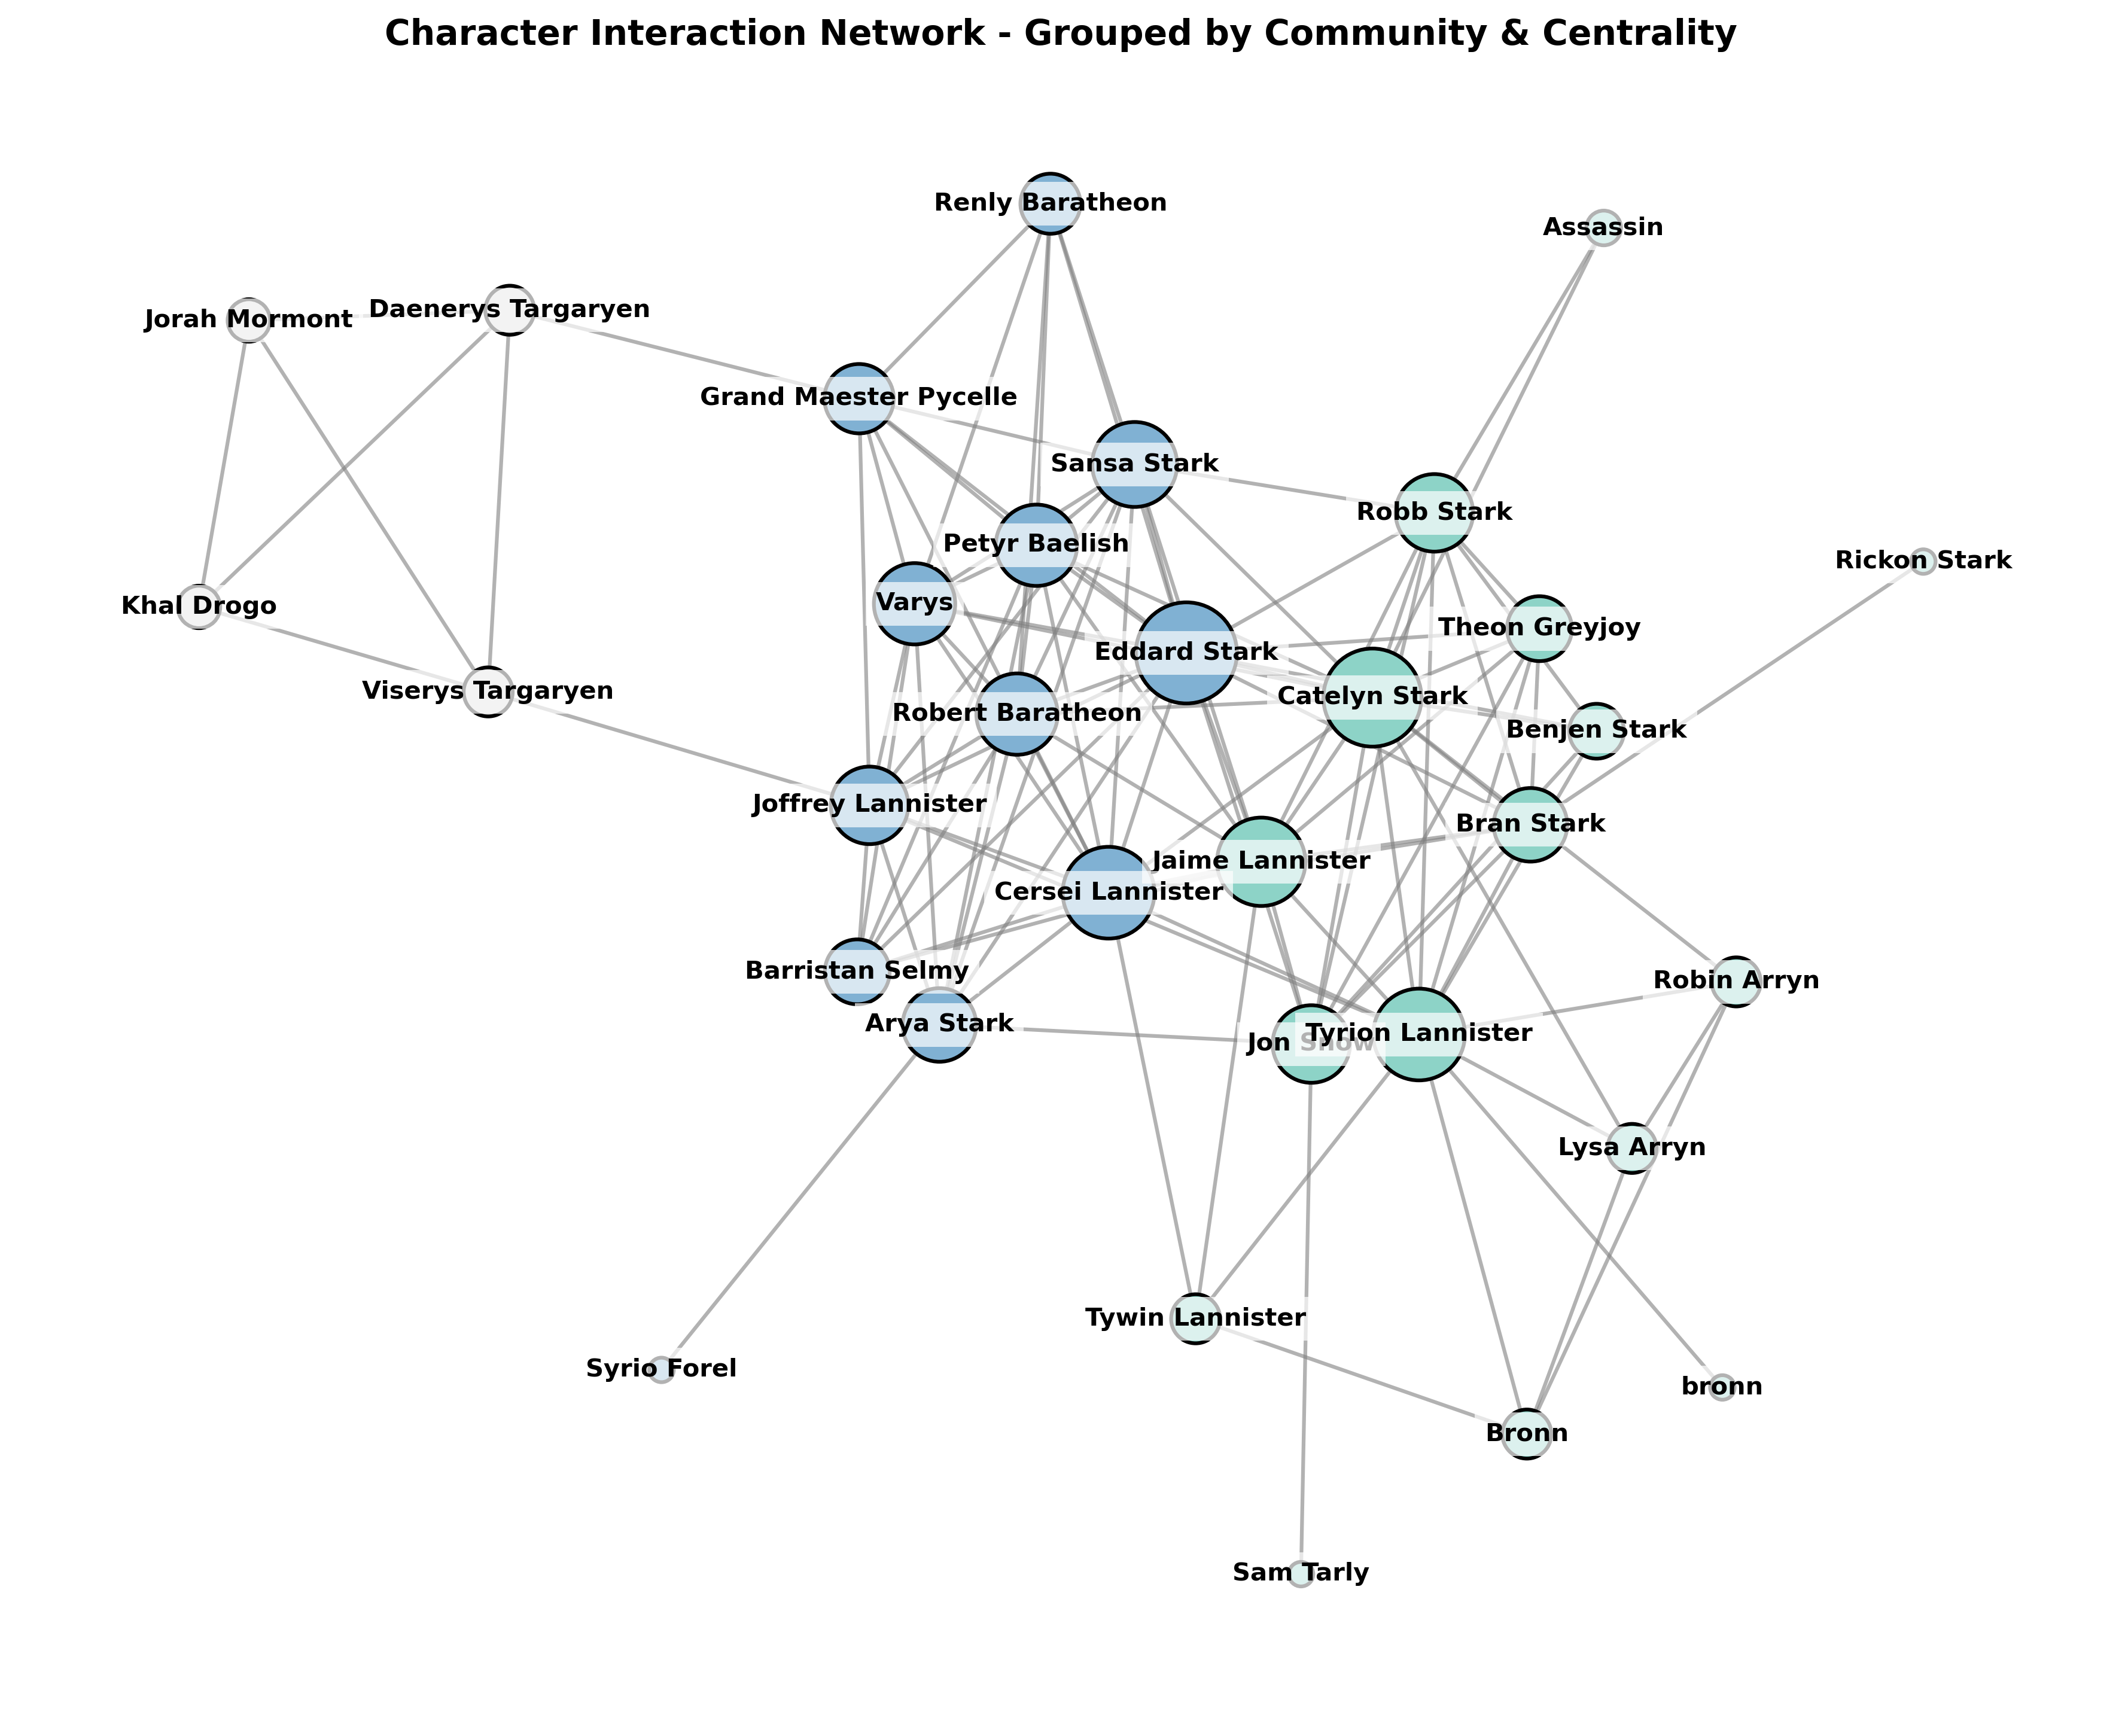

In [42]:
# Choose the Best Layout
pos = nx.kamada_kawai_layout(G)  # Alternative: nx.spring_layout(G, k=0.5)

# Plot the Graph
plt.figure(figsize=(15, 12), dpi=300)

# Draw Nodes with Community Colors and Sizes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, edgecolors="black", linewidths=1.5)

# Draw Edges
nx.draw_networkx_edges(G, pos, alpha=0.6, edge_color="gray", width=1.5)

# Draw Labels with Background to Avoid Overlap
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold",
                        bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))

# Add Title
plt.title("Character Interaction Network - Grouped by Community & Centrality", fontsize=14, fontweight="bold")

# Remove Axis
plt.axis("off")

# Show Plot
plt.show()
